In [0]:
from bs4 import BeautifulSoup
from bs4 import BeautifulSoup
import urllib, json

In [0]:
dates = []
titles = []
for i in range(100):
  try:
    url = 'https://content.guardianapis.com/search?from-date=2010-01-01&section=business&page-size=200&order-by=newest&page='+str(i+1)+'&q=amazon&api-key=207b6047-a2a6-4dd2-813b-5cd006b780d7'
    response = urllib.request.urlopen(url)
    encoding = response.info().get_content_charset('utf8')
    data = json.loads(response.read().decode(encoding))
    print(i)
    for j in range(len(data['response']['results'])):
      dates.append(data['response']['results'][j]['webPublicationDate'])
      titles.append(data['response']['results'][j]['webTitle'])  
  except:
    break

0
1
2
3
4
5
6


In [0]:
len(set(dates))

1271

In [0]:
dates[-1]

'2010-01-01T16:27:51Z'

In [0]:
import pandas as pd
data = pd.DataFrame(dates, titles)

In [0]:
data.head()

,0
Debenhams hopes rise as major supplier adds support to cash fillip,2019-02-12T19:22:39Z
Ocado prays warehouse blaze won’t douse its hopes for a hi-tech future,2019-02-09T19:00:57Z
HMV's new voice is relishing the fight to save all the stores,2019-02-08T15:38:59Z
Trade war fears mount as Trump says China meeting 'unlikely' - as it happened,2019-02-08T14:54:22Z
Huge fire at Ocado's Hampshire warehouse brought under control,2019-02-06T08:00:06Z


In [0]:
data = data.reset_index()
data.columns = ['title','date']
data.head()

,title,date
0,Debenhams hopes rise as major supplier adds su...,2019-02-12T19:22:39Z
1,Ocado prays warehouse blaze won’t douse its ho...,2019-02-09T19:00:57Z
2,HMV's new voice is relishing the fight to save...,2019-02-08T15:38:59Z
3,Trade war fears mount as Trump says China meet...,2019-02-08T14:54:22Z
4,Huge fire at Ocado's Hampshire warehouse broug...,2019-02-06T08:00:06Z


In [0]:
data['date']=data['date'].str[:10]

In [0]:
data.head()

,title,date
0,Debenhams hopes rise as major supplier adds su...,2019-02-12
1,Ocado prays warehouse blaze won’t douse its ho...,2019-02-09
2,HMV's new voice is relishing the fight to save...,2019-02-08
3,Trade war fears mount as Trump says China meet...,2019-02-08
4,Huge fire at Ocado's Hampshire warehouse broug...,2019-02-06


In [0]:
data['date']=pd.to_datetime(data['date'], format = '%Y-%m-%d')
data.head()

,title,date
0,Debenhams hopes rise as major supplier adds su...,2019-02-12
1,Ocado prays warehouse blaze won’t douse its ho...,2019-02-09
2,HMV's new voice is relishing the fight to save...,2019-02-08
3,Trade war fears mount as Trump says China meet...,2019-02-08
4,Huge fire at Ocado's Hampshire warehouse broug...,2019-02-06


In [0]:
data = data.sort_values(by='date')
data.head()

,title,date
1272,Private post operators clean up as customers s...,2010-01-01
1271,Waterstone's chief pays the price for poor Chr...,2010-01-14
1270,TalentPuzzle can work out recruitment answers,2010-01-14
1269,Apple looks for iSlate mobile partner,2010-01-19
1268,Amazon shelves Macmillan titles in ebook row,2010-01-31


In [0]:
data_final = data.groupby('date').first().reset_index()

In [0]:
!wget https://www.dropbox.com/s/6fab2uqje8e5bf5/stock_data.csv

--2019-02-17 08:53:43--  https://www.dropbox.com/s/6fab2uqje8e5bf5/stock_data.csv
Resolving www.dropbox.com (www.dropbox.com)... 162.125.8.1, 2620:100:601b:1::a27d:801
Connecting to www.dropbox.com (www.dropbox.com)|162.125.8.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/6fab2uqje8e5bf5/stock_data.csv [following]
--2019-02-17 08:53:43--  https://www.dropbox.com/s/raw/6fab2uqje8e5bf5/stock_data.csv
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc83613d95df21d9befa9b4539a1.dl.dropboxusercontent.com/cd/0/inline/AbfZaBz3MOd8vZSdbYRJbDMESbwbEvx35G91uO13JG_4Ai_b1PCIThqhE2fR2Fsgf_DSX4bUDoqnkY5E4bo6TiV8_1r1hHri9JN_jXsdhvpyC2_zVvEfcyGsz0i2wp1s1q4/file# [following]
--2019-02-17 08:53:43--  https://uc83613d95df21d9befa9b4539a1.dl.dropboxusercontent.com/cd/0/inline/AbfZaBz3MOd8vZSdbYRJbDMESbwbEvx35G91uO13JG_4Ai_b1PCIThqhE2fR2Fsgf_DSX4bUDoqnkY5E4bo6TiV8_1r1hHri9JN_jXsdhvpy

In [0]:
!ls

sample_data  stock_data.csv


# The last 5 days' stock price only

In [0]:
import pandas as pd
data2 = pd.read_csv('/content/stock_data.csv')
data2.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2009-12-31,137.089996,137.279999,134.520004,134.520004,134.520004,4523000
1,2010-01-04,136.250000,136.610001,133.139999,133.899994,133.899994,7599900
2,2010-01-05,133.429993,135.479996,131.809998,134.690002,134.690002,8851900
3,2010-01-06,134.600006,134.729996,131.649994,132.250000,132.250000,7178800
4,2010-01-07,132.009995,132.320007,128.800003,130.000000,130.000000,11030200


In [0]:
data2.loc[0:5]['Close'].values

array([134.520004, 133.899994, 134.690002, 132.25    , 130.      ,
       133.520004])

In [0]:
x= []
y = []
for i in range(data2.shape[0]-5):
  x.append(data2.loc[i:(i+4)]['Close'].values)
  y.append(data2.loc[i+5]['Close'])

In [0]:
import numpy as np
x = np.array(x)
y = np.array(y)

In [0]:
print(x.shape, y.shape)

(2256, 5) (2256,)


In [0]:
x = x.reshape(x.shape[0],x.shape[1],1)

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.30,random_state=10)

In [0]:
import os
import keras.backend as K
from keras.models import Sequential, Model
from keras.layers import Conv2D, ZeroPadding2D, BatchNormalization, Input, Dropout
from keras.layers import Conv2DTranspose, Reshape, Activation, Cropping2D, Flatten
from keras.layers import Concatenate
from keras.layers.advanced_activations import LeakyReLU
from keras.activations import relu
from keras.initializers import RandomNormal
from keras.layers import Embedding
from keras.layers import LSTM, RepeatVector, TimeDistributed, Dense, Bidirectional

Using TensorFlow backend.


In [0]:
model = Sequential()
model.add(Dense(100, input_shape = (5,1), activation = 'relu'))
model.add((LSTM(100)))
model.add(Dense(1000,activation='relu'))
model.add(Dense(1,activation='linear'))
model.summary()

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 5, 100)            200       
_________________________________________________________________
lstm_1 (LSTM)                (None, 100)               80400     
_________________________________________________________________
dense_2 (Dense)              (None, 1000)              101000    
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 1001      
Total params: 182,601
Trainable params: 182,601
Non-trainable params: 0
_________________________________________________________________


In [0]:
from keras.optimizers import Adam
adam = Adam(lr=0.0001)
model.compile(optimizer=adam, loss='mean_squared_error')

In [0]:
model.fit(X_train, y_train, epochs=300, batch_size=64, validation_data=(X_test, y_test), verbose = 1)

Instructions for updating:
Use tf.cast instead.
Train on 1579 samples, validate on 677 samples
Epoch 1/300
1579/1579 [==============================] - 3s 2ms/step - loss: 519486.1102 - val_loss: 526735.2634
Epoch 2/300
1579/1579 [==============================] - 0s 311us/step - loss: 517622.8930 - val_loss: 524695.0965
Epoch 3/300
1579/1579 [==============================] - 0s 275us/step - loss: 515647.5467 - val_loss: 522759.3561
Epoch 4/300
1579/1579 [==============================] - 0s 289us/step - loss: 513658.6844 - val_loss: 520639.0607
Epoch 5/300
1579/1579 [==============================] - 1s 323us/step - loss: 511181.3763 - val_loss: 517846.2681
Epoch 6/300
1579/1579 [==============================] - 0s 314us/step - loss: 508224.3434 - val_loss: 514439.6392
Epoch 7/300
1579/1579 [==============================] - 0s 310us/step - loss: 504452.3644 - val_loss: 510488.5049
Epoch 8/300
1579/1579 [==============================] - 0s 314us/step - loss: 500392.8210 - val_loss:

In [0]:
pred = model.predict(X_test)

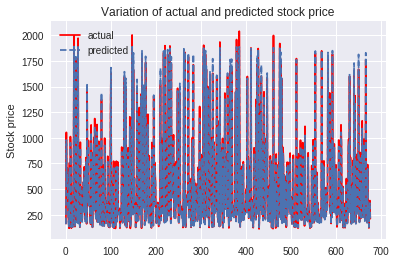

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(10,10))
plt.plot(y_test,'r',label='actual')
plt.plot(pred,'--', label = 'predicted')

plt.title('Variation of actual and predicted stock price')
plt.ylabel('Stock price')
plt.legend()

# The pitfall

In [0]:
X_train = x[:2100,:,:]
y_train = y[:2100]

X_test = x[2100:,:,:]
y_test = y[2100:]

In [0]:
model = Sequential()
model.add(Dense(100, input_shape = (5,1), activation = 'relu'))
model.add((LSTM(100)))
model.add(Dense(1000,activation='relu'))
model.add(Dense(1,activation='linear'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 5, 100)            200       
_________________________________________________________________
lstm_2 (LSTM)                (None, 100)               80400     
_________________________________________________________________
dense_5 (Dense)              (None, 1000)              101000    
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 1001      
Total params: 182,601
Trainable params: 182,601
Non-trainable params: 0
_________________________________________________________________


In [0]:
from keras.optimizers import Adam
adam = Adam(lr=0.0001)
model.compile(optimizer=adam, loss='mean_squared_error')

In [0]:
model.fit(X_train, y_train, epochs=300, batch_size=64, validation_data=(X_test, y_test), verbose = 1)

Train on 2100 samples, validate on 156 samples
Epoch 1/300
2100/2100 [==============================] - 1s 689us/step - loss: 330456.0585 - val_loss: 3094049.2821
Epoch 2/300
2100/2100 [==============================] - 1s 284us/step - loss: 328374.2852 - val_loss: 3085698.5577
Epoch 3/300
2100/2100 [==============================] - 1s 277us/step - loss: 326152.5634 - val_loss: 3076714.2051
Epoch 4/300
2100/2100 [==============================] - 1s 274us/step - loss: 323618.2336 - val_loss: 3066391.6923
Epoch 5/300
2100/2100 [==============================] - 1s 279us/step - loss: 320799.4935 - val_loss: 3054782.6090
Epoch 6/300
2100/2100 [==============================] - 1s 283us/step - loss: 317636.9001 - val_loss: 3041614.7244
Epoch 7/300
2100/2100 [==============================] - 1s 276us/step - loss: 314079.0817 - val_loss: 3026965.6026
Epoch 8/300
2100/2100 [==============================] - 1s 277us/step - loss: 310166.9251 - val_loss: 3010588.7051
Epoch 9/300
2100/2100 [==

In [0]:
pred = model.predict(X_test)

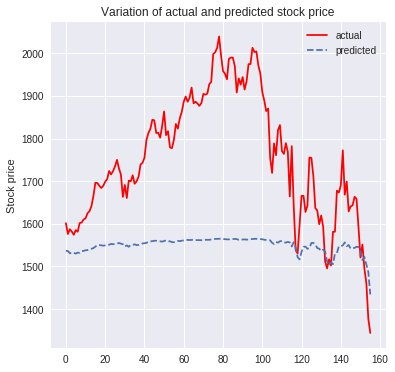

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(6,6))
plt.plot(y_test,'r',label='actual')
plt.plot(pred,'--', label = 'predicted')

plt.title('Variation of actual and predicted stock price')
plt.ylabel('Stock price')
plt.legend()

In [0]:
t = []
for i in range(pred.shape[0]):
  t.append(pred[i][0])

In [0]:
df = pd.DataFrame([y_test, t]).T
df.columns = ['actual','predicted']
df.head()

,actual,predicted
0,1601.540039,1536.650269
1,1576.119995,1536.316895
2,1587.280029,1530.876953
3,1581.760010,1533.011719
4,1574.369995,1531.937378


In [0]:
df['error'] = np.square(df['actual']-df['predicted'])
df = df.sort_values(by='error',ascending=False)
df.head(10)

,actual,predicted,error
78,2039.510010,1564.883667,225270.165477
95,2012.979980,1564.211304,201393.324818
77,2012.709961,1564.714844,200699.625080
97,2004.359985,1564.726807,193277.331514
96,2003.000000,1564.884888,191944.851630
76,2002.380005,1564.632812,191622.604542
75,1998.099976,1563.269287,189077.728001
79,1994.819946,1565.277832,184506.427673
84,1990.000000,1564.439087,181102.090747
85,1989.869995,1564.498047,180941.294252


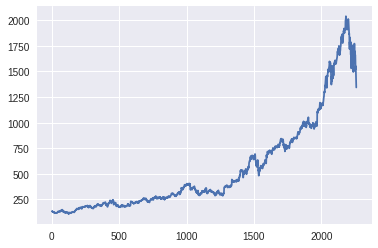

In [0]:
plt.plot(data2['Close'])

# Assigning different weights for different time periods

In [0]:
import numpy as np
from keras.layers import Dense, Input
from keras import Model
import keras.backend as K
from functools import partial


def custom_loss_4(y_true, y_pred, weights):
    return K.square(K.abs(y_true - y_pred) * weights)

In [0]:
input_layer = Input(shape=(5,1))
weights_tensor = Input(shape=(1,))

In [0]:
i1 = Dense(100, activation='relu')(input_layer)
i2 = LSTM(100)(i1)
i3 = Dense(1000, activation='relu')(i2)
out = Dense(1, activation='linear')(i3)
model = Model([input_layer, weights_tensor], out)

In [0]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_10 (InputLayer)        (None, 5, 1)              0         
_________________________________________________________________
dense_28 (Dense)             (None, 5, 100)            200       
_________________________________________________________________
lstm_10 (LSTM)               (None, 100)               80400     
_________________________________________________________________
dense_29 (Dense)             (None, 1000)              101000    
_________________________________________________________________
dense_30 (Dense)             (None, 1)                 1001      
Total params: 182,601
Trainable params: 182,601
Non-trainable params: 0
_________________________________________________________________


In [0]:
cl4 = partial(custom_loss_4, weights=weights_tensor)

In [0]:
weights = np.arange(X_train.shape[0]).reshape((X_train.shape[0]),1)/2100

In [0]:
weights.shape

(2100, 1)

In [0]:
from keras.optimizers import Adam
adam = Adam(lr=0.0001)

In [0]:
y_test.shape

(156,)

In [0]:
test_weights = np.ones((156,1))
test_weights.shape

(156, 1)

In [0]:
model = Model([input_layer, weights_tensor], out)
model.compile(adam, cl4)
model.fit(x=[X_train, weights], y=y_train, epochs=300,batch_size = 32, validation_data = ([X_test, test_weights], y_test))

Train on 2100 samples, validate on 156 samples
Epoch 1/300
2100/2100 [==============================] - 2s 960us/step - loss: 236466.8113 - val_loss: 3083762.0705
Epoch 2/300
2100/2100 [==============================] - 1s 521us/step - loss: 233634.9988 - val_loss: 3061764.0962
Epoch 3/300
2100/2100 [==============================] - 1s 517us/step - loss: 230096.6852 - val_loss: 3032969.2756
Epoch 4/300
2100/2100 [==============================] - 1s 515us/step - loss: 225338.9558 - val_loss: 2994600.8077
Epoch 5/300
2100/2100 [==============================] - 1s 515us/step - loss: 219153.0303 - val_loss: 2942148.1923
Epoch 6/300
2100/2100 [==============================] - 1s 520us/step - loss: 210532.6862 - val_loss: 2871940.1410
Epoch 7/300
2100/2100 [==============================] - 1s 514us/step - loss: 200493.8360 - val_loss: 2794864.3141
Epoch 8/300
2100/2100 [==============================] - 1s 523us/step - loss: 189755.4265 - val_loss: 2712132.6923
Epoch 9/300
2100/2100 [==

In [0]:
pred = model.predict([X_test, test_weights])

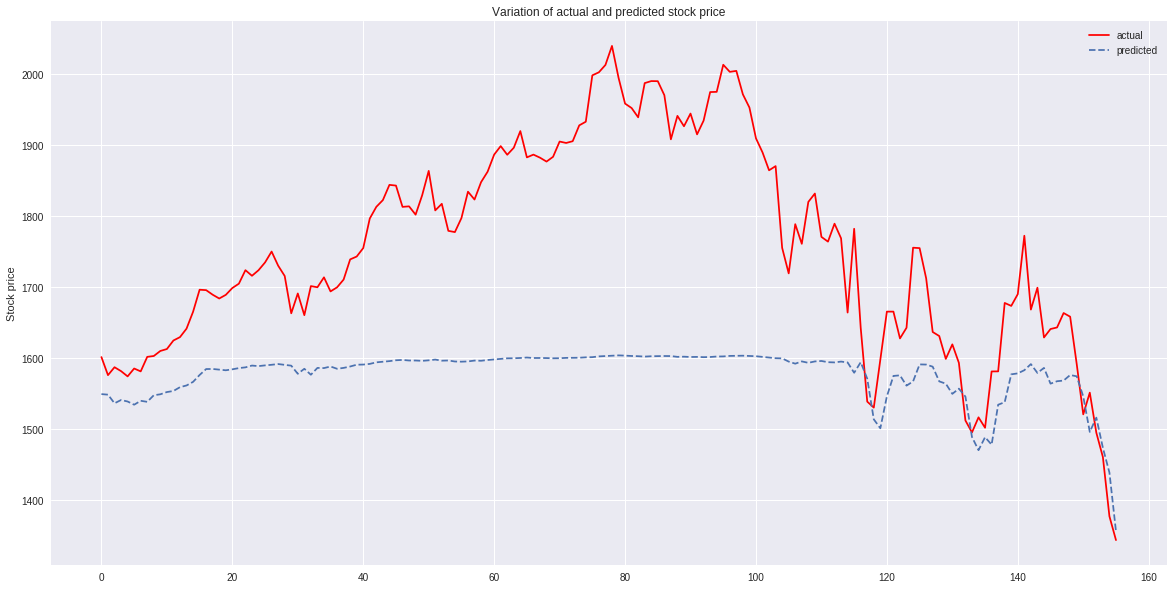

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(20,10))
plt.plot(y_test,'r',label='actual')
plt.plot(pred,'--', label = 'predicted')

plt.title('Variation of actual and predicted stock price')
plt.ylabel('Stock price')
plt.legend()

# The last 5 days' stock prices plus news title data

In [0]:
data2['Date'] = pd.to_datetime(data2['Date'],format='%Y-%m-%d')

In [0]:
data3 = pd.merge(data2,data_final, left_on = 'Date', right_on = 'date', how='left')
data3.head()

,Date,Open,High,Low,Close,Adj Close,Volume,date,title
0,2009-12-31,137.089996,137.279999,134.520004,134.520004,134.520004,4523000,NaT,NaN
1,2010-01-04,136.250000,136.610001,133.139999,133.899994,133.899994,7599900,NaT,NaN
2,2010-01-05,133.429993,135.479996,131.809998,134.690002,134.690002,8851900,NaT,NaN
3,2010-01-06,134.600006,134.729996,131.649994,132.250000,132.250000,7178800,NaT,NaN
4,2010-01-07,132.009995,132.320007,128.800003,130.000000,130.000000,11030200,NaT,NaN


In [0]:
data3['title'].nunique()

685

In [0]:
import nltk
import re
nltk.download('stopwords')
stop = nltk.corpus.stopwords.words('english')
def preprocess(text):
    text = str(text)
    text=text.lower()
    text=re.sub('[^0-9a-zA-Z]+',' ',text)
    words = text.split()
    words2=[w for w in words if (w not in stop)]
    #words3=[ps.stem(w) for w in words]
    words4=' '.join(words2)
    return(words4)
data3['title'] = data3['title'].apply(preprocess)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [0]:
data3['title']=np.where(data3['title'].isnull(),'-','-'+data3['title'])

In [0]:
docs = data3['title'].values

In [0]:
from collections import Counter
counts = Counter()
for i,review in enumerate(docs):
  counts.update(review.split())
words = sorted(counts, key=counts.get, reverse=True)
vocab_size=len(words)
word_to_int = {word: i for i, word in enumerate(words, 1)}
encoded_docs = []
for doc in docs:
  encoded_docs.append([word_to_int[word] for word in doc.split()])

In [0]:
vocab_size

2390

In [0]:
max_length = 20
from keras.preprocessing.sequence import pad_sequences
padded_docs = pad_sequences(encoded_docs, maxlen=max_length,padding='pre')

In [0]:
len(padded_docs)

2261

In [0]:
x1 = []
x2 = []
y = []
for i in range(data3.shape[0]-5):
  x1.append(data3.loc[i:(i+4)]['Close'].values)
  x2.append(padded_docs[i+5])
  y.append(data3.loc[i+5]['Close'])

In [0]:
x2[0].shape

(20,)

In [0]:
input1 = Input(shape=(20,))
model = Embedding(input_dim=vocab_size+1, output_dim=32, input_length=20)(input1)
model = (LSTM(units=100))(model)
model = (Dense(1, activation='tanh'))(model)

In [0]:
input2 = Input(shape=(5,1))
model2 = Dense(100, activation='relu')(input2)
model2 = LSTM(units=100)(model2)
model2 = (Dense(1000, activation="relu"))(model2)
model2 = (Dense(1, activation="linear"))(model2)

In [0]:
from keras.layers import multiply
conc = multiply([model, model2])

In [0]:
from keras.layers import concatenate
conc = concatenate([model, model2])

In [0]:
conc2 = (Dense(1000, activation="relu"))(conc)
out = (Dense(1, activation="linear"))(conc2)

In [0]:
model = Model([input1, input2, weights_tensor], out)
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            (None, 5, 1)         0                                            
__________________________________________________________________________________________________
input_3 (InputLayer)            (None, 20)           0                                            
__________________________________________________________________________________________________
dense_11 (Dense)                (None, 5, 100)       200         input_4[0][0]                    
__________________________________________________________________________________________________
embedding_1 (Embedding)         (None, 20, 32)       76512       input_3[0][0]                    
__________________________________________________________________________________________________
lstm_5 (LS

In [0]:
!apt install graphviz
!pip install pydot pydot-ng

Reading package lists... Done
Building dependency tree       
Reading state information... Done
graphviz is already the newest version (2.40.1-2).
0 upgraded, 0 newly installed, 0 to remove and 8 not upgraded.


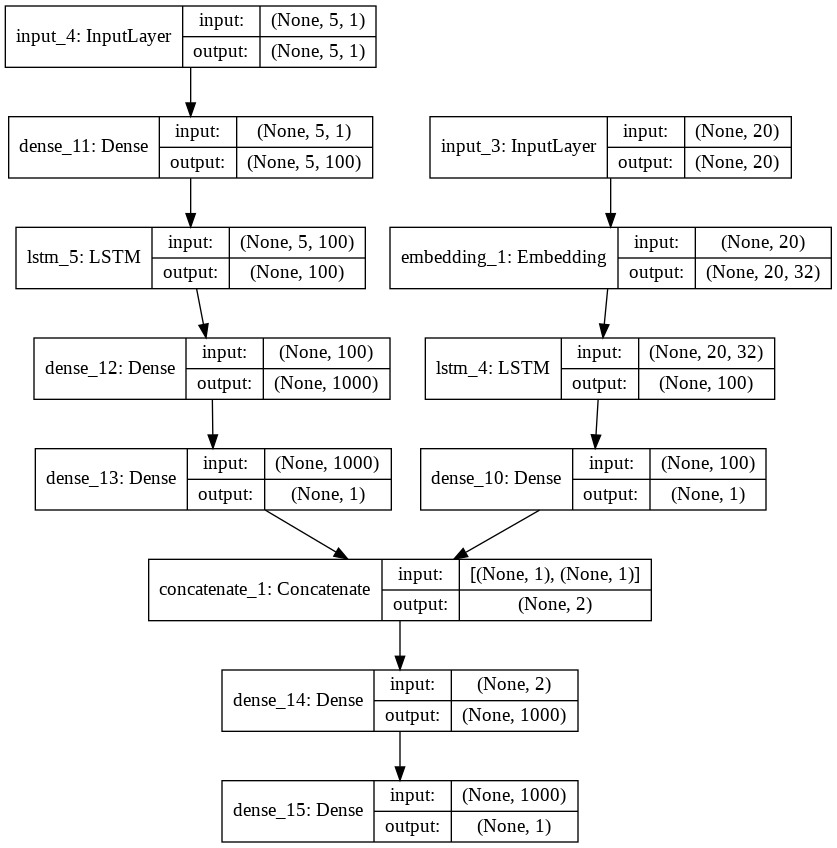

In [0]:
from keras.utils import plot_model

plot_model(model, show_shapes=True, show_layer_names=True, to_file='model.png')
from IPython.display import Image
Image(retina=True, filename='model.png')

In [0]:
x1 = np.array(x1)
x2 = np.array(x2)
y = np.array(y)

In [0]:
x1 = x1.reshape(x1.shape[0],x1.shape[1],1)

In [0]:
x2.shape

(2256, 20)

In [0]:
X1_train = x1[:2100,:,:]
X2_train = x2[:2100,:]
y_train = y[:2100]

X1_test = x1[2100:,:,:]
X2_test = x2[2100:,:]
y_test = y[2100:]

In [0]:
print(X1_train.shape, X2_train.shape, y_train.shape)

(2100, 5, 1) (2100, 20) (2100,)


In [0]:
model = Model([input1, input2, weights_tensor], out)
model.compile(adam, cl4)
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_15 (InputLayer)           (None, 5, 1)         0                                            
__________________________________________________________________________________________________
input_14 (InputLayer)           (None, 20)           0                                            
__________________________________________________________________________________________________
dense_40 (Dense)                (None, 5, 100)       200         input_15[0][0]                   
__________________________________________________________________________________________________
embedding_3 (Embedding)         (None, 20, 32)       76896       input_14[0][0]                   
__________________________________________________________________________________________________
lstm_14 (L

In [0]:
model.fit(x=[X2_train, X1_train, weights], y=y_train, epochs=300,batch_size = 32, validation_data = ([X2_test, X1_test, test_weights], y_test))

Train on 2100 samples, validate on 156 samples
Epoch 1/300
2100/2100 [==============================] - 8s 4ms/step - loss: 230478.9033 - val_loss: 2866778.7308
Epoch 2/300
2100/2100 [==============================] - 2s 1ms/step - loss: 140464.4590 - val_loss: 1733777.6506
Epoch 3/300
2100/2100 [==============================] - 2s 1ms/step - loss: 55168.2837 - val_loss: 1015164.2099
Epoch 4/300
2100/2100 [==============================] - 2s 1ms/step - loss: 34133.5545 - val_loss: 904989.6538
Epoch 5/300
2100/2100 [==============================] - 2s 1ms/step - loss: 27829.3951 - val_loss: 766175.2324
Epoch 6/300
2100/2100 [==============================] - 2s 1ms/step - loss: 20090.6768 - val_loss: 604526.6667
Epoch 7/300
2100/2100 [==============================] - 2s 1ms/step - loss: 15044.9645 - val_loss: 548285.6498
Epoch 8/300
2100/2100 [==============================] - 2s 1ms/step - loss: 10978.0928 - val_loss: 519912.2356
Epoch 9/300
2100/2100 [=============================

KeyboardInterrupt: ignored

In [0]:
pred = model.predict([X2_test, X1_test, test_weights])

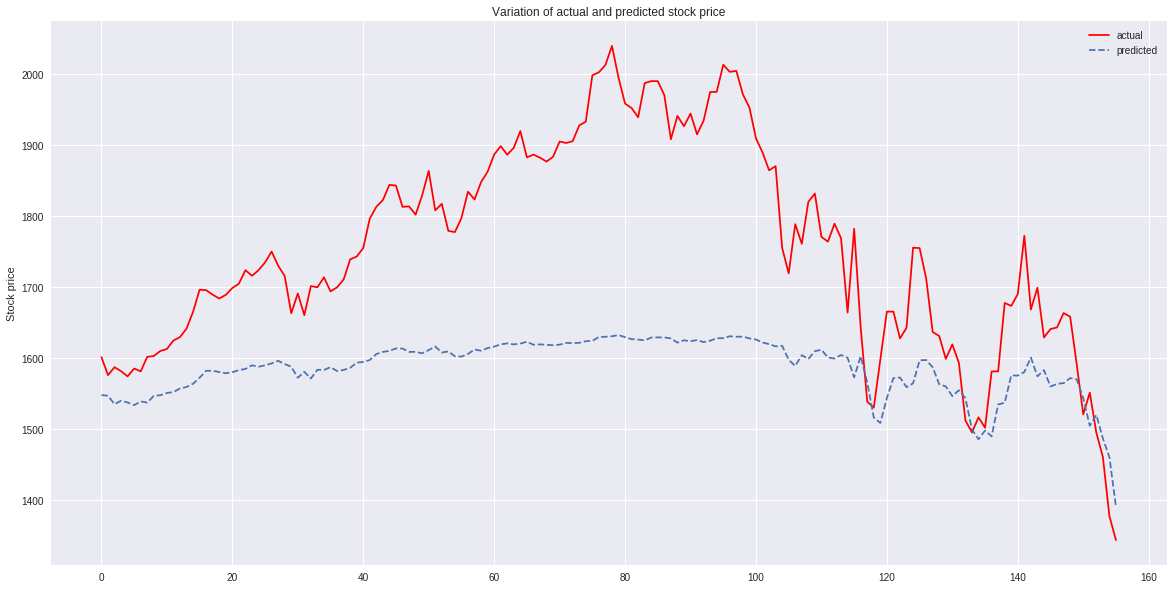

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(20,10))
plt.plot(y_test,'r',label='actual')
plt.plot(pred,'--', label = 'predicted')

plt.title('Variation of actual and predicted stock price')
plt.ylabel('Stock price')
plt.legend()